<a href="https://colab.research.google.com/github/vikasbda21/Deep-Learning/blob/main/Customer_Churn_Prediction_using_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Build Artificial Neural Network using Keras**

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import tensorflow as tf

In [3]:
print(tf.__version__)

2.8.0


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [5]:
df = pd.read_csv('/content/drive/MyDrive/Churn_Modelling.csv')

In [6]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
df.duplicated().sum()

0

In [9]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [10]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [11]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [12]:
df.drop(columns=['RowNumber','CustomerId','Surname'], inplace=True)

In [13]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [14]:
df=pd.get_dummies(df,columns=['Geography','Gender'], drop_first=True)

In [15]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [16]:
# Independent & Dependent 
X= df.drop(columns=['Exited'])
y=df['Exited']
X.shape

(10000, 11)

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=1)

In [18]:
X_train.shape

(8000, 11)

In [19]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled= scaler.transform(X_test)

In [20]:
X_test_scaled

array([[-1.03768121,  0.77498705, -1.0482813 , ..., -0.58312392,
        -0.57273139,  0.91509065],
       [ 0.30708683, -0.46686456, -0.70174202, ..., -0.58312392,
        -0.57273139,  0.91509065],
       [-1.23422423,  0.29735181, -1.0482813 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       ...,
       [-0.86182692, -0.46686456,  1.72403288, ..., -0.58312392,
         1.74601919,  0.91509065],
       [-0.30323097, -0.84897275, -1.0482813 , ...,  1.71490137,
        -0.57273139, -1.09278791],
       [ 0.04847759,  1.25262228,  1.3774936 , ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [21]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [22]:
model = Sequential()

model.add(Dense(11,activation='relu', input_dim=11))
model.add(Dense(11,activation='relu',))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11)                132       
                                                                 
 dense_1 (Dense)             (None, 11)                132       
                                                                 
 dense_2 (Dense)             (None, 1)                 12        
                                                                 
Total params: 276
Trainable params: 276
Non-trainable params: 0
_________________________________________________________________


In [23]:
from sklearn import metrics
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [24]:
history = model.fit(X_train_scaled,y_train,epochs=100, validation_split=0.2)

Epoch 1/100
200/200 [==============================] - 5s 5ms/step - loss: 0.5484 - accuracy: 0.7455 - val_loss: 0.4700 - val_accuracy: 0.7981
Epoch 2/100
200/200 [==============================] - 1s 4ms/step - loss: 0.4536 - accuracy: 0.8059 - val_loss: 0.4387 - val_accuracy: 0.8150
Epoch 3/100
200/200 [==============================] - 1s 4ms/step - loss: 0.4342 - accuracy: 0.8161 - val_loss: 0.4295 - val_accuracy: 0.8181
Epoch 4/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4257 - accuracy: 0.8220 - val_loss: 0.4239 - val_accuracy: 0.8188
Epoch 5/100
200/200 [==============================] - 1s 4ms/step - loss: 0.4199 - accuracy: 0.8242 - val_loss: 0.4193 - val_accuracy: 0.8206
Epoch 6/100
200/200 [==============================] - 1s 4ms/step - loss: 0.4151 - accuracy: 0.8275 - val_loss: 0.4161 - val_accuracy: 0.8244
Epoch 7/100
200/200 [==============================] - 1s 4ms/step - loss: 0.4116 - accuracy: 0.8275 - val_loss: 0.4138 - val_accuracy: 0.8244

In [30]:
model.layers[0].get_weights()

[array([[ 0.15004165,  0.07210909,  0.22472043,  0.1380183 ,  0.23624766,
          0.08781319,  0.08745839, -0.40986976, -0.36561593,  0.19450448,
          0.4494338 ],
        [-0.20472   ,  0.10342901, -0.07419588, -0.1360886 , -0.05868693,
         -0.83502597, -0.75546587,  0.15075184, -0.4273677 ,  0.75620615,
         -0.844977  ],
        [-0.5005016 , -0.22860265,  0.6137957 , -0.04804206,  0.153362  ,
         -0.6054701 ,  0.04378031, -0.25806385,  0.09882478,  0.31283763,
         -0.16224897],
        [-0.6209256 ,  0.20579413,  0.02407177, -0.25166875,  0.2957666 ,
          0.3920597 , -0.04381723,  0.5266724 ,  0.33515385, -0.11840402,
         -0.1920458 ],
        [-0.62786835, -0.08190246, -0.01824262, -1.5627629 ,  0.97773296,
         -0.37463352, -0.08380479,  0.15362981, -0.23895422, -0.28660613,
         -0.30577743],
        [-0.48536655,  0.63587904,  0.25242323,  0.02842857,  0.07182435,
         -0.33941808, -0.04390915, -0.14728001,  0.17419389,  0.3237010

In [31]:
model.predict(X_test_scaled)

array([[0.04685276],
       [0.13170335],
       [0.06419675],
       ...,
       [0.00574506],
       [0.05720974],
       [0.4268519 ]], dtype=float32)

In [32]:
y_log = model.predict(X_test_scaled)

In [33]:
y_pred = np.where(y_log>0.5,1,0)

In [34]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8575

In [35]:
history.history

{'accuracy': [0.7454687356948853,
  0.8059375286102295,
  0.8160937428474426,
  0.8220312595367432,
  0.82421875,
  0.8274999856948853,
  0.8274999856948853,
  0.8303124904632568,
  0.8318750262260437,
  0.8326562643051147,
  0.8339062333106995,
  0.8356249928474426,
  0.8370312452316284,
  0.836718738079071,
  0.839062511920929,
  0.8417187333106995,
  0.8454687595367432,
  0.8475000262260437,
  0.8492187261581421,
  0.8526562452316284,
  0.8540624976158142,
  0.8540624976158142,
  0.8551562428474426,
  0.8592187762260437,
  0.8582812547683716,
  0.8600000143051147,
  0.8610937595367432,
  0.8598437309265137,
  0.8620312213897705,
  0.8610937595367432,
  0.8609374761581421,
  0.8621875047683716,
  0.8629687428474426,
  0.8648437261581421,
  0.8635937571525574,
  0.8623437285423279,
  0.8635937571525574,
  0.8639062643051147,
  0.8637499809265137,
  0.862500011920929,
  0.8618749976158142,
  0.8659374713897705,
  0.86328125,
  0.864062488079071,
  0.8635937571525574,
  0.86234372854232

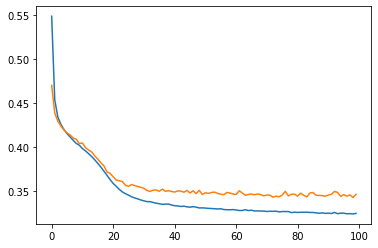

In [36]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

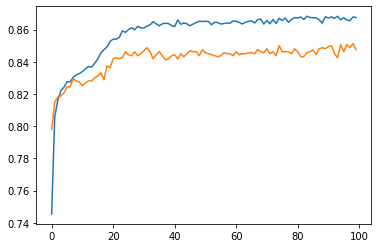

In [37]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])